# Reporte de métricas y conclusiones

De todos los modelos he elegido el que mejor equilibrio tiene entre precision, sensibilidad y puntuacion ha sido SVC, aunque ha sido uno de los más lentos de todos los modelos.

In [14]:
# Librerias
from joblib import load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
import string
import nltk
from google.colab import drive
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
# montamos GDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Cargando el dataset creado:
df = pd.read_csv('drive/MyDrive/NLP/df_preprocessed.csv')

# Asignar clasificaciones de estrellas a etiquetas de sentimiento
etiqueta = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1}
df['etiqueta'] = df['overall'].map(etiqueta)

X = df['reviewText']
y = df['etiqueta']

# Dividir los datos en datos de entrenamiento y prueba 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(min_df=25, max_df=0.95, ngram_range=(1,4), max_features=2500)
vectorizer.fit(X)
X_train_tf = vectorizer.transform(X_train)
# Tomando X como entrada y convirtiéndolo en matriz de características
X_train_tf = X_train_tf.todense()
X_test_tf = vectorizer.transform(X_test)
# Tomando X como entrada y convirtiéndolo en matriz de características
X_test_tf = X_test_tf.todense()

X_train_tf = np.asarray(X_train_tf)
X_test_tf = np.asarray(X_test_tf)

In [ ]:
# Cargando el modelo SVC:
svc_model = load('drive/MyDrive/NLP/modelo_svc.joblib')


# Evaluar modelo SVC
y_pred = svc_model.predict(X_test_tf)


# Matriz de confusión

In [ ]:
#Calculando accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Matriz de confusión:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Accuracy: 0.8162
Confusion matrix:
[[1376  503]
 [ 361 2460]]


El modelo clasifico correctamente el 81% de los datos de prueba ya que su precision fue del 0.8
La matriz de confusión muestra que su modelo hizo 1376   predicciones negativas verdaderas y 2460 predicciones positivas verdaderas, lo que indica que puede identificar correctamente ambas clases.


# Curva Roc

AUC: 0.8022


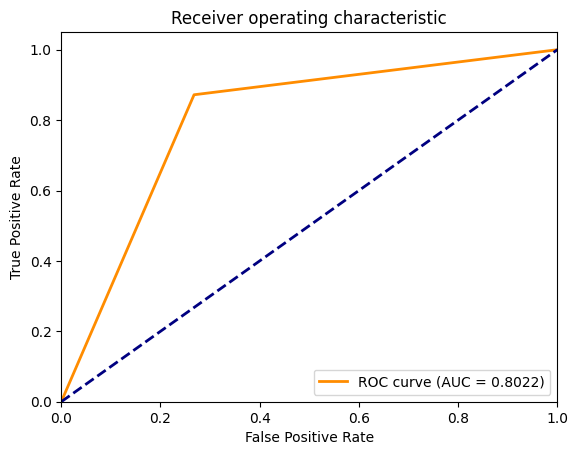

In [ ]:
#Curva Roc: AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

#Graficando Curva Roc:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

La puntuación AUC de 0.8 de la curva ROC nos considera que el modelo tiene una buena capacidad para distinguir entre las clases positivas y negativas.



# Metricas: Accuracy, recall y F1-score

In [ ]:
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Precision: 0.8302396220047249
Recall: 0.8720311946118398
F1-score: 0.8506224066390042


Las metricas del modelo son 0.83 de presicion en predicciones positivas que fueron realmente correctas., 0.87  sensibilidad,  positivos reales que fueron identificados correctamente y 0.85 es la media armónica entre precisión y recall.

Nos que representa un rendimiento decente.


# Curva de Precision-Recall

Average precision-recall score: 0.80


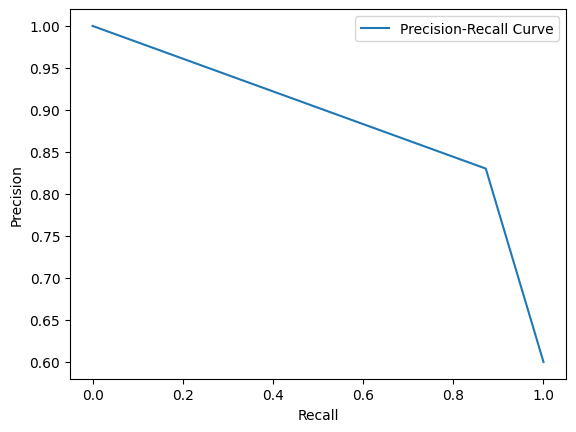

In [ ]:
from sklearn.metrics import average_precision_score

# Calcular average precision
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

#Obteniendo valores de precision, recall y thresholds (umbrales):
precision, recall, _ = precision_recall_curve(y_test, y_pred)

#Graficando curva Precision-Recall:
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

El AP es de 0.8 por lo que es una bueña señal

# Curva de aprendizaje

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

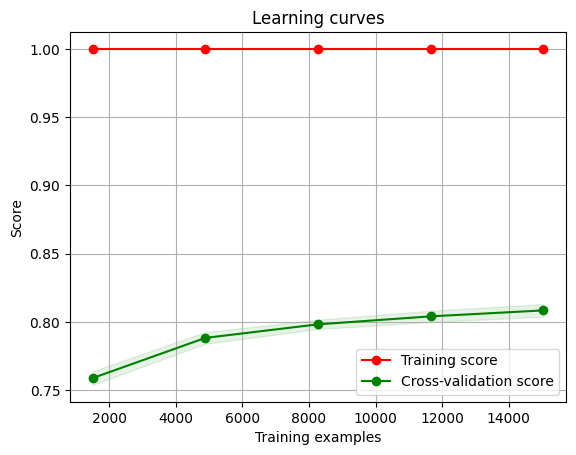

In [ ]:
#Definiendo curva de aprendizaje:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Graficando:
plot_learning_curve(svc_model, "Learning curves", X_train_tf, y_train, cv=5)

La descripción de la curva de aprendizaje que proporcionas sugiere varias conclusiones:
+ Sobreajuste (Overfitting): Si el training score está siempre en 1, significa que el modelo es capaz de ajustarse perfectamente a los datos de entrenamiento, independientemente de cuántos ejemplos estén disponibles. Esto es un claro indicativo de sobreajuste, ya que el modelo está memorizando los datos de entrenamiento en lugar de generalizar a partir de ellos.

+ Mejora con Más Datos: La puntuación de validación cruzada (cross-validation score) va aumentando a medida que se añaden más ejemplos de entrenamiento. Esto sugiere que el modelo se beneficia de más datos y podría seguir mejorando si se le proporcionan más ejemplos.

+ Brecha entre Entrenamiento y Validación: Dado que la puntuación de entrenamiento es perfecta (1) y la de validación cruzada es considerablemente más baja (~0.75 a ~0.81), hay una brecha notable entre estas dos puntuaciones. Esta brecha es un signo de sobreajuste. Sin embargo, es alentador que la puntuación de validación cruzada siga aumentando con más datos.

En Validación parece que hay un punto alrededor de los 8,000 ejemplos donde la puntuación de validación se estanca alrededor del 0.8. Esto podría sugerir que incluso con más datos, el modelo podría tener problemas para superar significativamente este punto de rendimiento.


In [ ]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=c7de011757008076daf31f76b2ecb2397fb7a7fff7db51214344ad63e4d97258
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


# Pruebas con nuevos datos

In [ ]:
from num2words import num2words

nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords = set(stopwords) - set(['not', 'no', 'nor', 'but'])
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

# Crear la función para preprocesar el texto

def preprocess(text):
    # Obtener todo el texto en minúsculas:
    text = text.lower()
    # Eliminar puntuación:
    text = text.translate(str.maketrans("", "", string.punctuation))
    # tokenizar el texto:
    text = nltk.word_tokenize(text)
    # Inicializar lematizador:
    lemmatizer = WordNetLemmatizer()
    # Obtener lista de palabras vacías (stopwords):
    stopwords = nltk.corpus.stopwords.words("english")
    # Inicializar lista para almacenar texto limpio:
    clean_text = []
    for word in text:
        #Eliminar palabras vacías:
        if word not in stopwords:
            #Lematizar el texto:
            token = lemmatizer.lemmatize(word)
            # Convertir dígitos a palabras:
            if token.isdigit():
                token = num2words(token, lang='en')
            clean_text.append(token)
    return clean_text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:


texto = "The gameplay is smooth, and the graphics are just stunning. Absolutely love it!"

def analizar_texto(text):
    text = preprocess(text)
    vectorized_sentence = vectorizer.transform([' '.join(text)])
    vectorized_sentence = np.asarray(vectorized_sentence.todense())
    predicted_sentiment = svc_model.predict(vectorized_sentence)
    if predicted_sentiment[0] == 1:
        print("Positive")
    else:
        print("Negative")

analizar_texto(texto)



Positive


In [ ]:
# Positivas
analizar_texto("The best toy for my toddler. Durable, educational, and provides endless fun.")
analizar_texto("This board game brings the whole family together. Challenging and engaging.")
analizar_texto("This action figure is well-detailed and a great addition to my collection.")
analizar_texto("Excellent puzzle game. Boosts creativity and problem-solving skills. Highly recommended.")

Positive
Positive
Positive
Positive


In [ ]:
# Negativas
analizar_texto("Toy quality is poor. Broke within the first week.")
analizar_texto("The pieces of the puzzle don't fit together well. It is a very frustrating game and not worth it.")
analizar_texto("Game instructions are too confusing. Too difficult for casual play.")
analizar_texto("The action figure is not worth the price. Poor paint job and loose joints.")
analizar_texto("The game is glitchy and crashes often. Very disappointing.")

Negative
Negative
Negative
Negative
Negative


Despues de analizar nuevas datos que no se encuentran dentro del corpus podemos decir que el modelo SVC precide correctamente nuevas reseñas a pesar de tener overfiting en entrenamiento.